# K-Means - Iris Flower dataset:

The Iris Flower dataset is another popular dataset for classification included in the **sklearn** library. It contains 150 samples of several flowers among three species (setosa, versicolor or virginica, 50 in each of the three classes), and the attributes length and width of sepals and petals in cm.

However, in this notebook we will address the problem of flower identification as an unsupervised learning problem. In other words, we are going to cluster the samples without having information about their labels. Therefore, we are going to implement a function based on the **K-Means clustering algorithm** on the first and second variables of the dataset. The K-Means algorithm consists of several actions:

1. **Randomly initialize** as many **centroids** as clusters are contemplated, assigning to each datapoint the class of the nearest centroid.
2. Calculate the** average** position of the **datapoints** belonging to each **cluster**.
3. **Update** the position of the **centroids** to these averages.
4. We **re-assign** each datapoint to the nearest centroid class.
5. Go to 2, **repeating until** we reach a **convergence** point, where the composition of each cluster does not vary, or meet a certain stopping criteria.


First of all, we are going to load the data and gain insights using the command DESCR. It should be noted that we only load the data, we discard the labels as it is an unsupervised problem:


In [0]:
import numpy   as np
import scipy   as sc
import sklearn as sk
import matplotlib.pyplot as plt
import pandas  as pd

from sklearn.datasets       import load_iris
from sklearn.preprocessing  import scale

iris_data = load_iris()

print(iris_data.DESCR)

  # We only load the data. We don't load iris_data.target, since it's unsupervised learning

X = iris_data.data

print(X.shape)

sepal_length = X[:, 0:1]
sepal_width = X[:, 1:2]

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Next, we are going to design a method to visualize in each iteration the position of the centroids, indicating with colors which cluster each datapoint belongs to. In addition, we will be able to contemplate a trail that represents how each centroid moves as iterations advace. In order to be able to graph it in a friendly way I have decided to limit the maximum number of iterations to 5:

In [0]:
import random

def kMeans(x1, x2, k, dist, max_iters=5):
  # Different datapoints and centroids color names
  datapoints_colors = ["crimson", "darkgreen", "royalblue", "gold", "sandybrown", "lightpink", "darkgrey", "turquoise"]
  centroids_colors = ["red", "green", "blue", "yellow", "orange", "pink", "grey", "cyan"]

  # Standardization by subtraction of mean and division of std deviation
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Random initialization of the centroids.
  ic = random.sample(range(x1.shape[0]), k)  # Non-repetitive random number
  cent = np.array([x1[ic, 0], x2[ic, 0]]).T

  fig = plt.figure(figsize=(17,17))

    # Plot the randomly initialized centroids above the samples in grey
  ax = fig.add_subplot(3, 2, 1)  # 3 rows 2 columns plot
  ax.set_facecolor("whitesmoke")  # plots bakground color
  for c in range(0,k):
    plt.scatter(x1, x2, color='grey', alpha=0.8) 
    plt.plot(cent[c, 0], cent[c, 1], marker="X", c=centroids_colors[c], markersize=14, markeredgecolor='k', markeredgewidth=0.8)
  plt.title("Initialization of the centroids", fontweight="bold")
  
  # Save the position of the centroids along the iterations
  cent_record = [cent.tolist()]  # Trajectory (or evolution) will be plotted afterwards 

  labels = np.zeros((len(x1),1), dtype=int)
  distances = np.zeros((len(x1),1))

  for ite in range(1, max_iters+1):  # Iteration loop
    for samp in range(0, len(x1)):  # Available samples loop
      # Calculate distance to centroids
      dist_to_centroids = np.array([dist([x1[samp],x2[samp]],[cent[a,0],cent[a,1]]) for a in range(k)])
      # Update label to each sample according to proximity
      labels[samp,0]=np.argmin(dist_to_centroids)
      # Update distances to the centroid of the cluster
      distances[samp,0]=np.min(dist_to_centroids)     

    ax = fig.add_subplot(3, 2, ite+1)
    ax.set_facecolor("whitesmoke")

    for c in range(0,k):  # Recalculate new centroids position for each cluster
      # Average of datapoints position
      cent[c, 0] = np.mean(x1[labels == c]) if np.sum(x1[labels == c]) != 0 else 0  # X-axis
      cent[c, 1] = np.mean(x2[labels == c]) if np.sum(x2[labels == c]) != 0 else 0  # Y-axis
      # Scatter plot each datapoint of the cluster colored
      plt.scatter(x1[labels == c], x2[labels == c], color=datapoints_colors[c], alpha=0.8) 
      # Plot the centroid
      plt.plot(cent[c, 0], cent[c, 1], marker="X", c=centroids_colors[c], markersize=14, markeredgecolor='k', markeredgewidth=0.8)

    cent_record.append((cent).tolist())  # Update centroids record
    plt.title("Iteration "+str(ite), fontweight="bold")
    
    for cl in range(k):  # For each cluster
      for ep in range(ite):  # For each iteration
        # Plot a straight line connecting the cluster (t-1) with the cluster (t)
        orig = cent_record[ep][cl]  # Origin of the line
        dest = cent_record[ep+1][cl]  # Destination of the line
        x_ = [orig[0]]+[dest[0]]  # Group X coordinates
        y_ = [orig[1]]+[dest[1]]  # Group Y coordinates
        # Plot a line connecting the cluster (t-1) with the cluster (t)
        plt.plot(x_, y_, linewidth=2, c='233', linestyle='--')    
      
  plt.show()
  
  # return centroids, labels and distances to calculate WCSS and apply the Elbow method below
  return cent, labels, distances

Now let's run the k-Means algorithm with several cluster numbers and let's calculate the **WCSS** (Within-Cluster Sums of Squares, that is the sum of the Euclidean distances of each cluster raised to 2), since it serves to apply the **Elbow method** to determine the optimal number of clusters:

In [0]:
dist = lambda a, b: np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)  # Euclidean distance between two 2D points

clusters = range(2, 9)  # 8 clusters
WCSS = []

2 clusters:

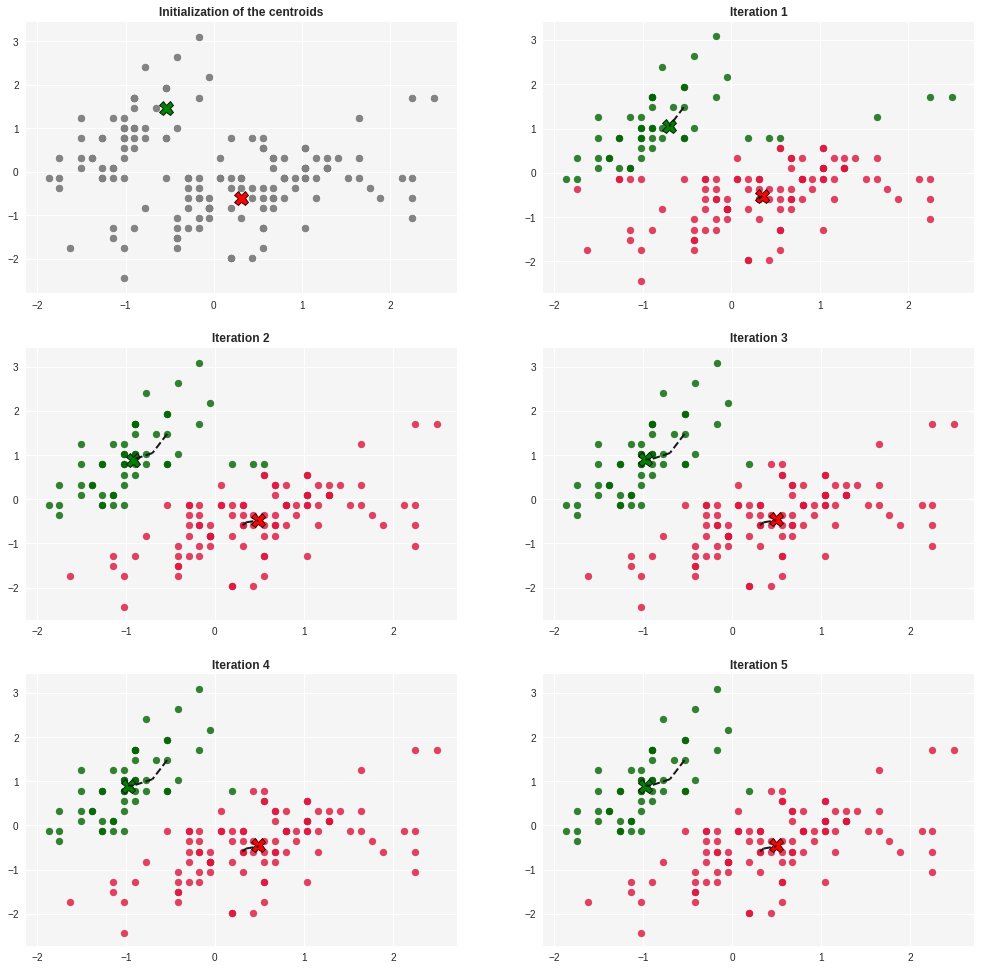

In [0]:
clust = clusters[0]  # 2 clusters 

centr, labels, distances = kMeans(sepal_length, sepal_width, clust, dist)

WCSS.append(np.sum([np.sum(distances[labels == c] ** 2) for c in range(clust)]))

3 clusters:

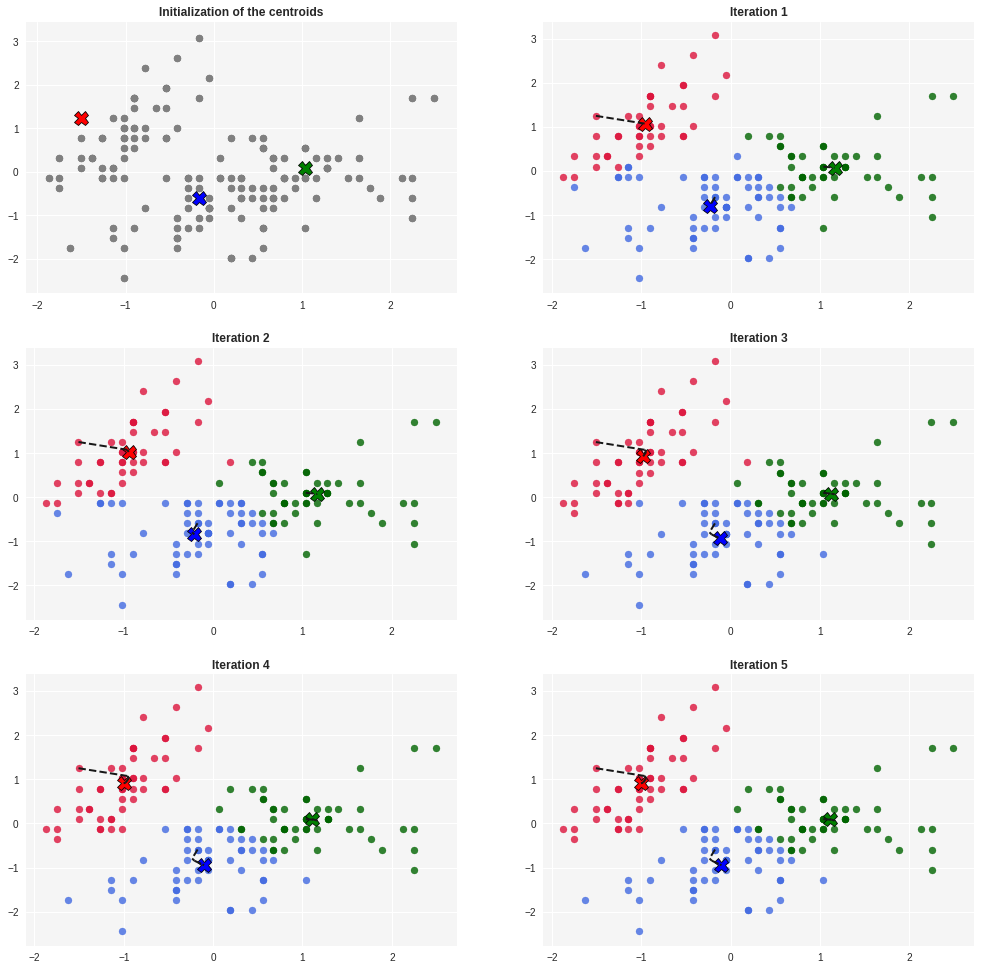

In [0]:
clust = clusters[1]  # 3 clusters 

centr, labels, distances = kMeans(sepal_length, sepal_width, clust, dist)

WCSS.append(np.sum([np.sum(distances[labels == c] ** 2) for c in range(clust)]))

4 clusters:

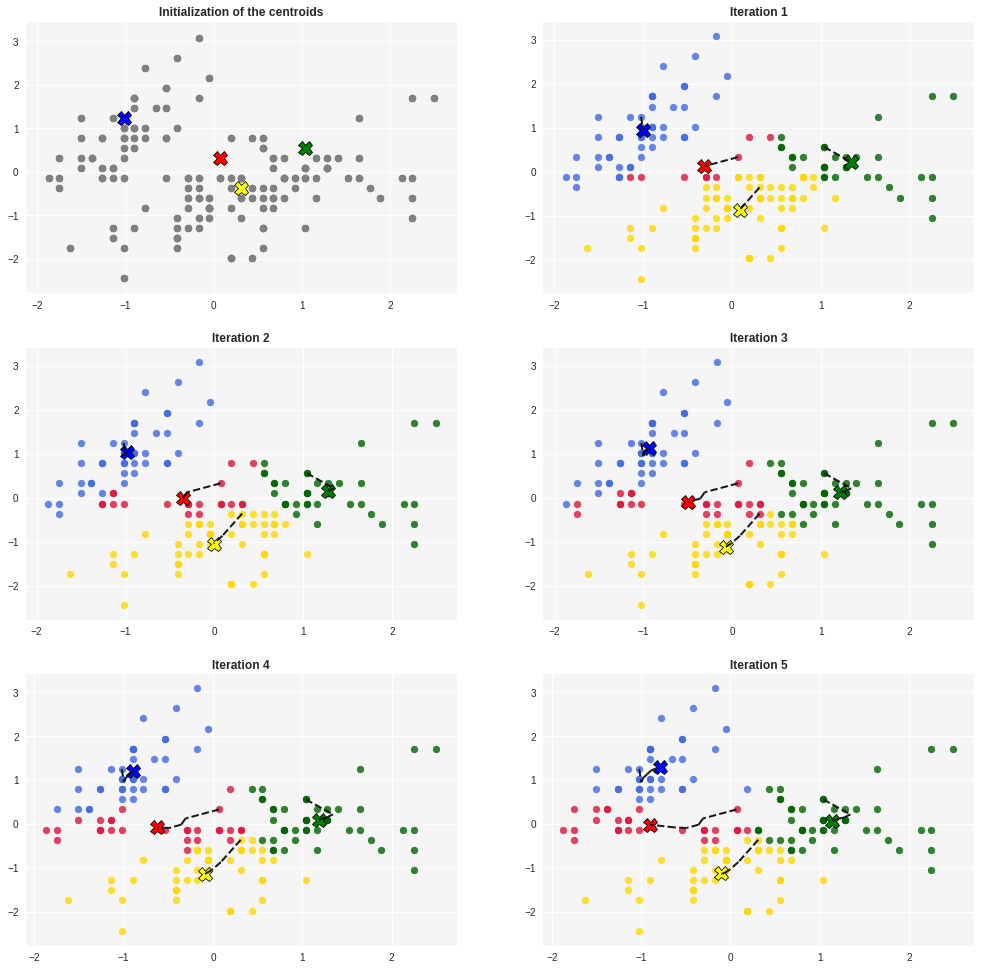

In [0]:
clust = clusters[2]  # 4 clusters 

centr, labels, distances = kMeans(sepal_length, sepal_width, clust, dist)

WCSS.append(np.sum([np.sum(distances[labels == c] ** 2) for c in range(clust)]))

5 clusters:

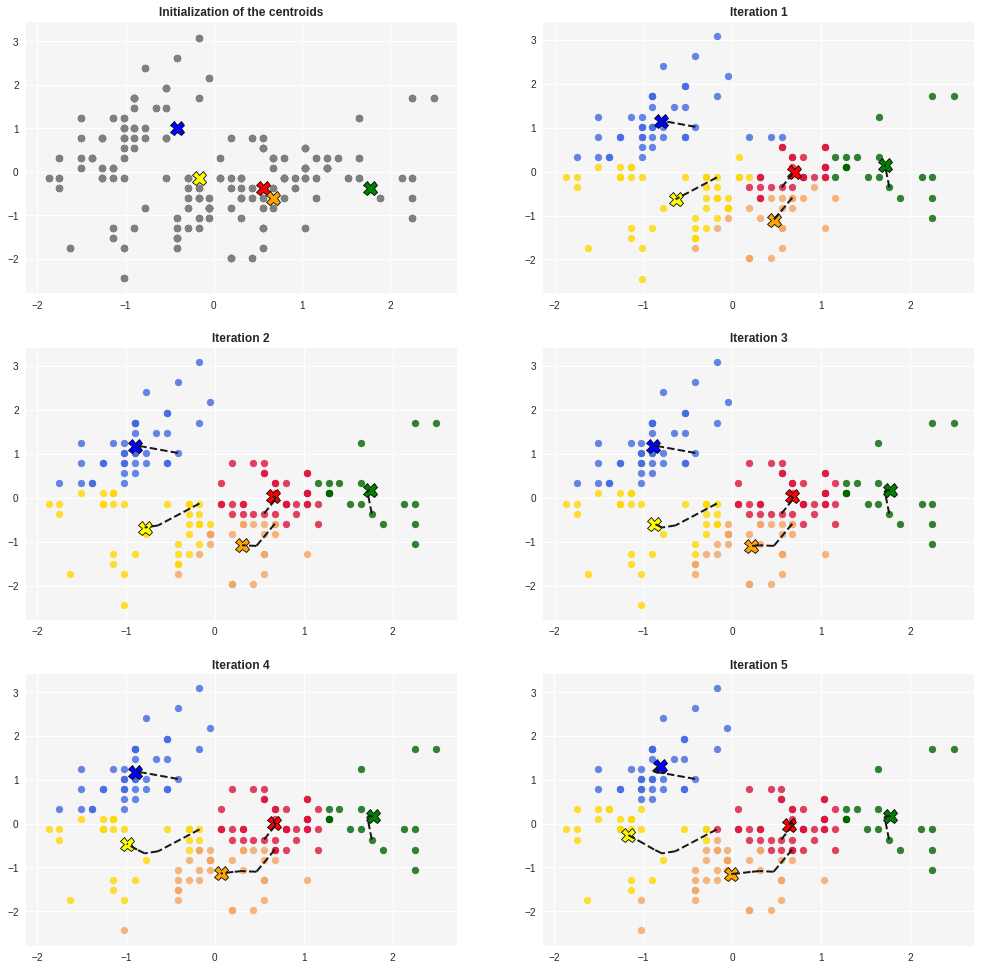

In [0]:
clust = clusters[3]  # 5 clusters 

centr, labels, distances = kMeans(sepal_length, sepal_width, clust, dist)

WCSS.append(np.sum([np.sum(distances[labels == c] ** 2) for c in range(clust)]))

6 clusters:

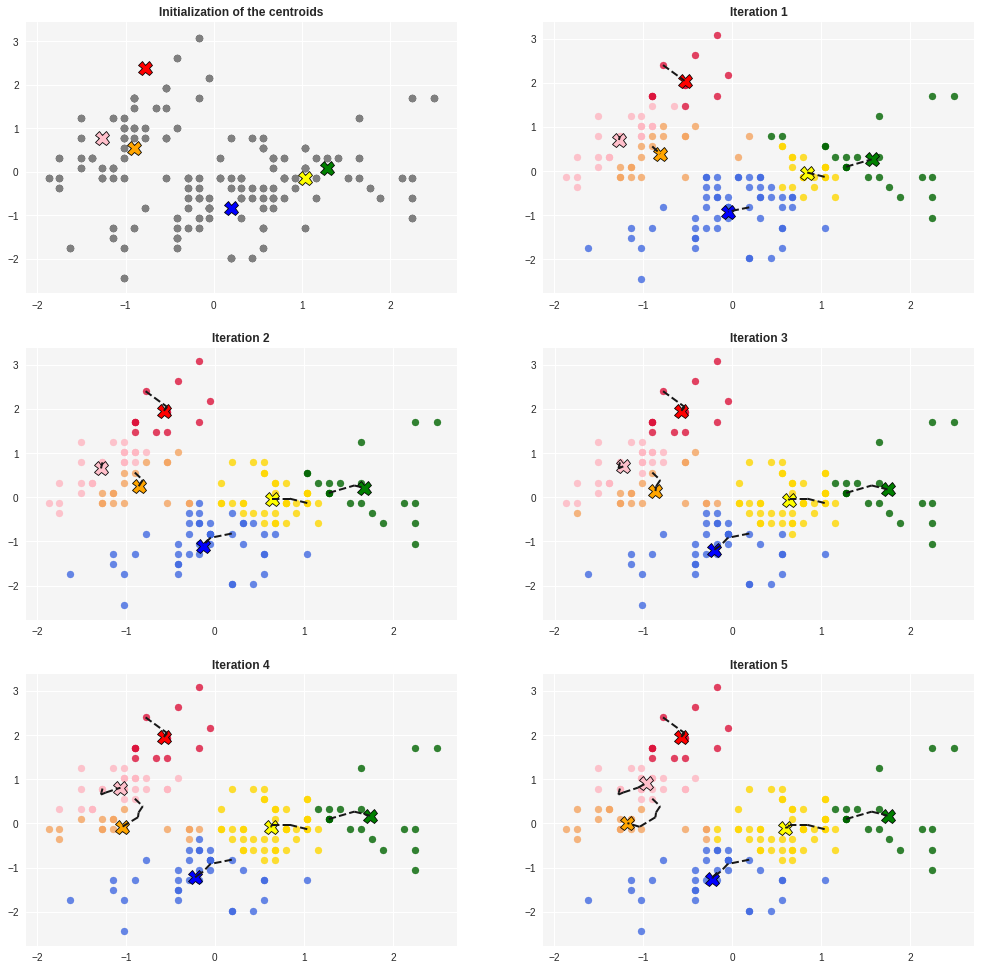

In [0]:
clust = clusters[4]  # 6 clusters 

centr, labels, distances = kMeans(sepal_length, sepal_width, clust, dist)

WCSS.append(np.sum([np.sum(distances[labels == c] ** 2) for c in range(clust)]))

7 clusters:

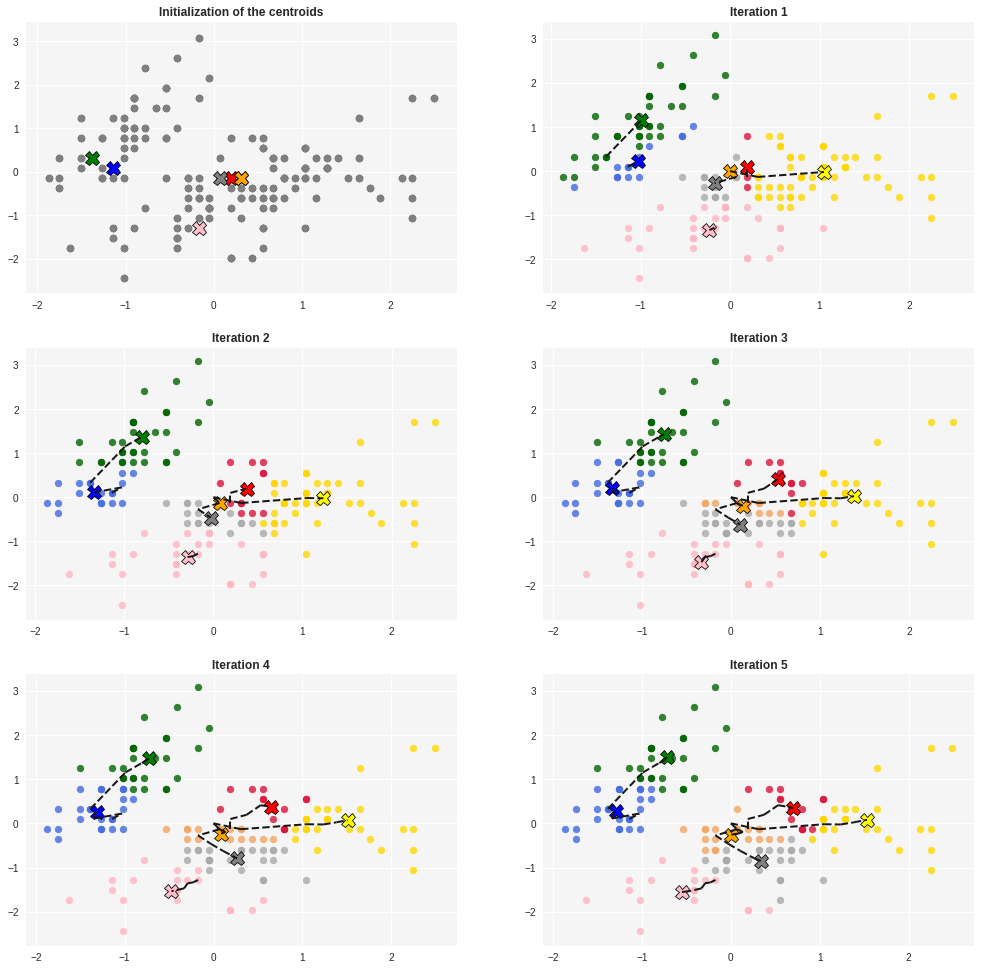

In [0]:
clust = clusters[5]  # 7 clusters 

centr, labels, distances = kMeans(sepal_length, sepal_width, clust, dist)

WCSS.append(np.sum([np.sum(distances[labels == c] ** 2) for c in range(clust)]))

8 clusters:

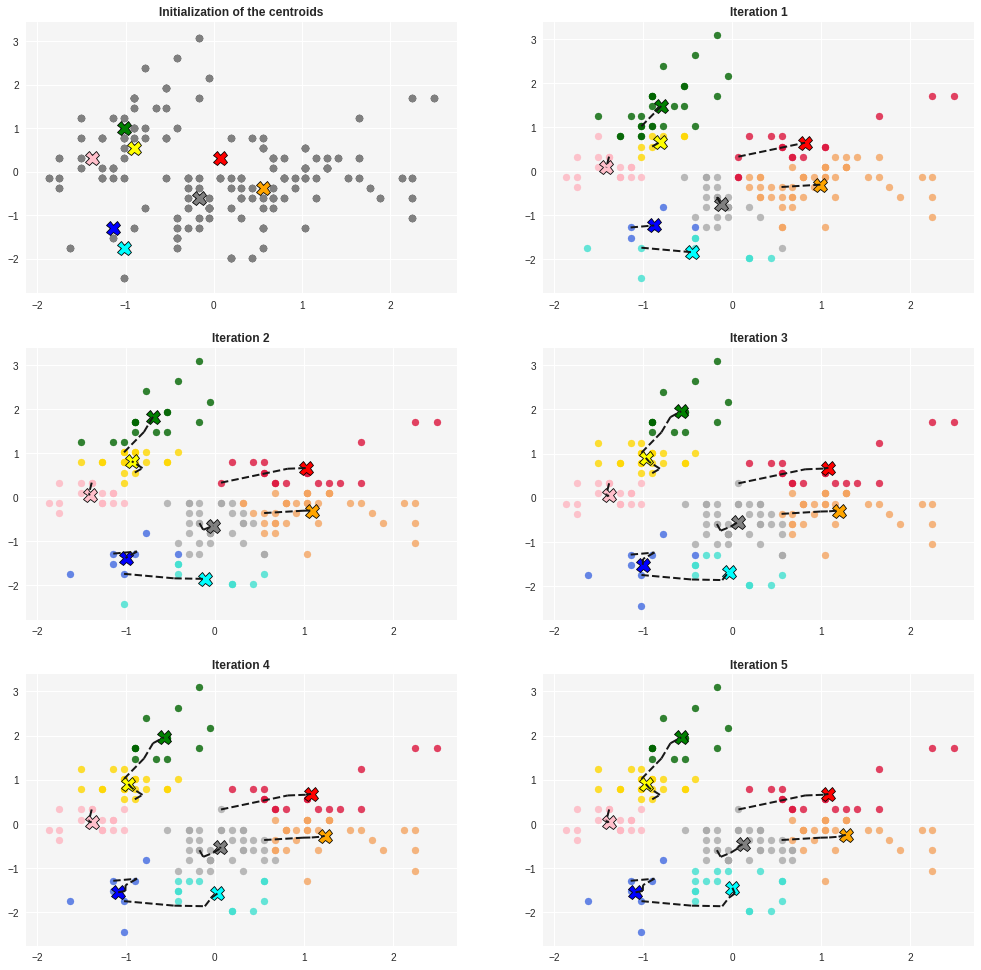

In [0]:
clust = clusters[6]  # 8 clusters 

centr, labels, distances = kMeans(sepal_length, sepal_width, clust, dist)

WCSS.append(np.sum([np.sum(distances[labels == c] ** 2) for c in range(clust)]))

As we can see in each of the figures, the clusters adjust themselves as the iterations proceed, until they are in the average position of all the datapoints belonging to the cluster. We can increase the number of maximum iterations to achieve a more refined cluster composition, so that the convergence of the algorithm is achieved.

Finally, let's graph the WCSS value obtained by each execution with a different number of clusters:

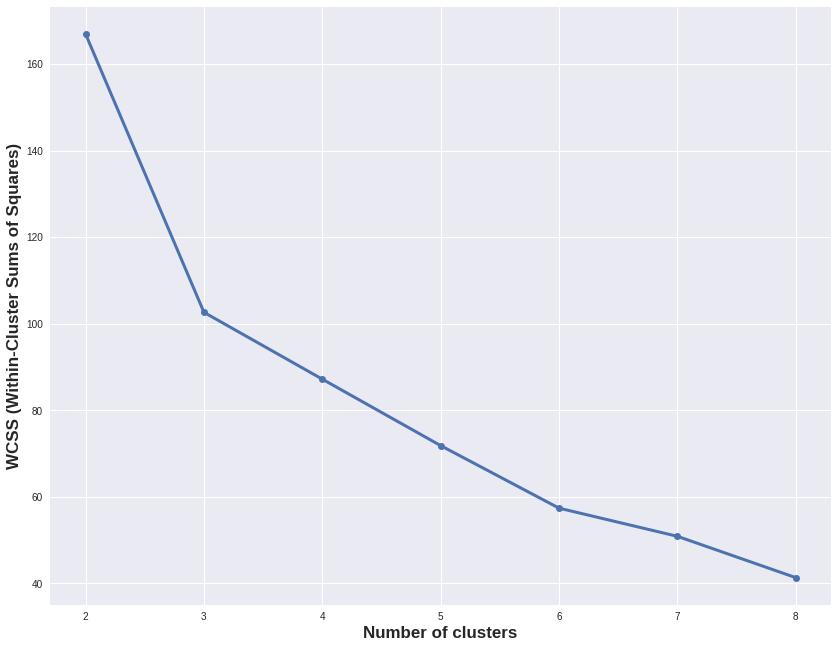

In [0]:
plt.figure(figsize=(14,11))
plt.plot(clusters, WCSS, "o-", linewidth=3)
plt.xlabel("Number of clusters", fontsize=17, fontweight="bold")
plt.ylabel("WCSS (Within-Cluster Sums of Squares)", fontsize=17, fontweight="bold")
plt.show()

The **Elbow method** is a very cool way to define what is the optimal number of clusters to use in grouping our data. At first sight, we should imagine the plot as if it were a human arm, in such a way that we place the optimum at the point that corresponds to the elbow. But, as [Asanka Perera](https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera/) found out, if we draw a line from the WCSS value reached by the lowest number of clusters to that reached by the highest number of clusters, the point furthest away from this line represents the optimal number of clusters:

![ELB](https://media.licdn.com/dms/image/C4E12AQGtYzxZcksIkQ/article-inline_image-shrink_1500_2232/0?e=1555545600&v=beta&t=mddttlxYE2VfVHmWB6wrOfKer6gjPkTZrEwn53uy0tI)

Then, based on this explaination and observing our WCSS plot, we can confirm that the optimum value of the number of clusters is **3**. If we look closely, this value corresponds to the total number of labels (Iris-Setosa, Iris-Versicolour and Iris-Virginica) that we discarded at the beginning, when treating the problem as an unsupervised problem. Therefore, the application of this method has been satisfactory.